In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
aq_=pd.read_csv(r"C:\Users\siddh\Downloads\updated_pollution_dataset.csv")
aq_

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [5]:
aq_.shape

(5000, 10)

In [4]:
aq_.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [6]:
aq_.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object

In [7]:
aq_.head(5)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [67]:
aq_.tail(5)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,1
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,2
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,2
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,0
4999,24.1,77.9,81.7,94.3,23.2,10.5,1.38,8.3,461,2


In [10]:
aq_.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [11]:
aq_.isna()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False


In [12]:
aq_.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [13]:
aq_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


# TO FIND THE CATAEGORICAL VALUES

In [14]:
categorical_features=[ i for i in aq_.columns if aq_[i].dtype =="Air Quality"]
aq_[categorical_features]

""
0
1
2
3
4
...
4995
4996
4997
4998


In [18]:
label_encoder = LabelEncoder()
aq_['Air Quality'] = label_encoder.fit_transform(aq_['Air Quality'])
aq_


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,1
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,2
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,2
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,0


In [35]:
print(aq_['Air Quality'].unique())  

[2 0 1 3]


In [19]:
aq_.index

RangeIndex(start=0, stop=5000, step=1)

# EDA CHART

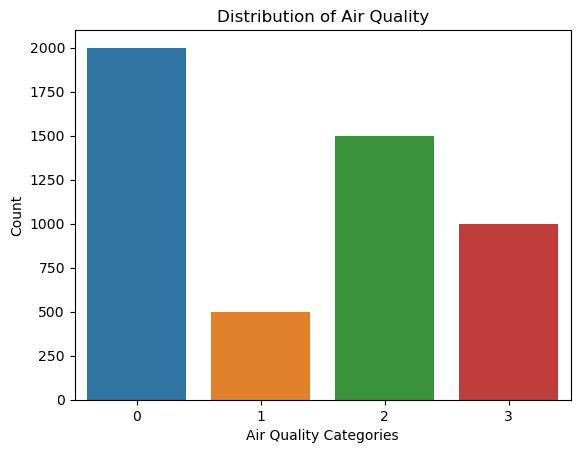

In [57]:
sns.countplot(x='Air Quality', data=aq_)
plt.title('Distribution of Air Quality')
plt.xlabel('Air Quality Categories')
plt.ylabel('Count')
plt.show();

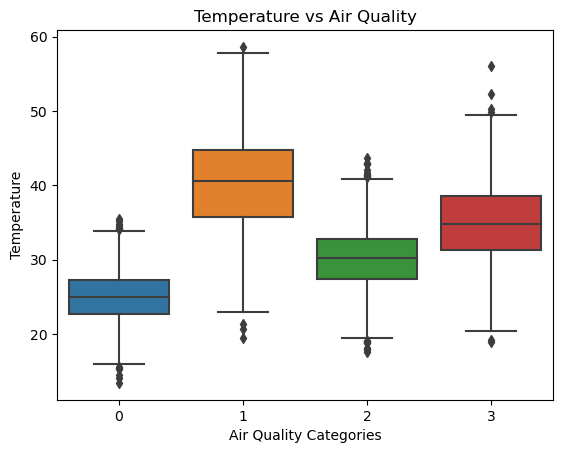

In [58]:
sns.boxplot(x='Air Quality', y='Temperature', data=aq_)
plt.title('Temperature vs Air Quality')
plt.xlabel('Air Quality Categories')
plt.ylabel('Temperature')
plt.show();

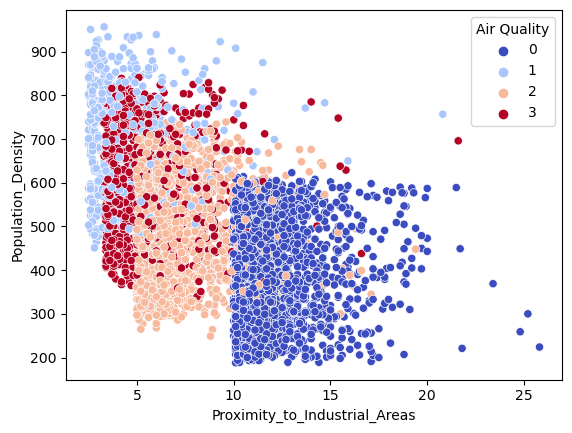

In [66]:
sns.scatterplot(
    x='Proximity_to_Industrial_Areas',
    y='Population_Density',
    hue='Air Quality',
    palette='coolwarm', 
    data=aq_
)
plt.show;

# LOGISTIC REGRESSION MODEL

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:

# Define features and target
X = aq_.drop(columns=['Air Quality']) 
y = aq_['Air Quality']

# to identify the x test and x test columns and values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
X_train

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
1840,39.1,82.9,56.7,69.3,39.7,8.2,2.00,3.6,543
2115,22.1,83.0,0.7,9.3,32.5,11.4,1.60,6.3,512
4437,34.5,77.7,6.2,7.1,25.6,8.9,1.71,8.1,500
1146,23.8,65.2,9.9,14.2,14.6,4.9,0.97,10.7,331
2486,34.6,81.4,21.9,32.1,29.6,1.9,1.19,6.9,512
...,...,...,...,...,...,...,...,...,...
4426,30.0,59.7,59.3,68.8,22.1,7.4,1.39,5.1,412
466,27.7,54.0,17.6,23.2,24.6,11.1,1.27,7.8,638
3092,24.2,67.6,19.4,35.1,24.2,9.6,1.91,6.2,422
3772,21.4,76.4,15.3,22.1,12.4,3.4,0.96,16.3,420


In [45]:
X_test

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
1501,31.3,73.4,72.8,88.8,54.1,17.1,2.54,2.6,755
2586,24.0,68.8,0.8,8.6,20.9,2.4,1.16,10.5,235
2653,25.4,78.6,4.1,6.7,21.3,9.1,1.40,10.1,543
1055,30.7,102.0,7.9,26.1,41.6,26.1,2.31,4.8,765
705,26.5,54.1,12.3,15.3,20.3,5.3,0.99,12.7,374
...,...,...,...,...,...,...,...,...,...
3563,20.9,58.2,17.5,23.6,18.8,3.9,0.94,10.9,420
1538,20.6,88.6,47.9,57.9,28.9,12.3,1.94,5.4,412
1837,34.7,75.8,2.7,6.4,33.2,6.3,1.50,7.8,335
2380,22.2,98.7,13.2,35.8,24.0,12.6,1.54,3.8,471


# to identify the y test and y test columns and values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
y_train

1840    3
2115    2
4437    2
1146    0
2486    2
       ..
4426    2
466     2
3092    3
3772    0
860     1
Name: Air Quality, Length: 3500, dtype: int32

In [49]:
y_test

1501    1
2586    0
2653    2
1055    1
705     0
       ..
3563    0
1538    2
1837    2
2380    3
1912    0
Name: Air Quality, Length: 1500, dtype: int32

In [33]:
# Split dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for regularization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model with regularization (L2 penalty)
model = LogisticRegression(penalty='l2', C=0.1)

# Train the model
model.fit(X_train, y_train)

# Evaluate performance
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

# Corrected accuracy calculation
print(" Accuracy:", round(test_acc * 100, 2))


Training Accuracy: 0.94
Testing Accuracy: 0.93
 Accuracy: 93.2


In [54]:
from sklearn.metrics import classification_report

# Generate classification report
report =classification_report(y_test, y_test_pred)

print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       618
           1       0.88      0.78      0.83       148
           2       0.94      0.94      0.94       452
           3       0.82      0.85      0.83       282

    accuracy                           0.93      1500
   macro avg       0.91      0.89      0.90      1500
weighted avg       0.93      0.93      0.93      1500



In [55]:
print(y_test_pred[:10])  # Shows first 10 predictions
print(y_test[:10].values)  # Shows actual values for comparison

[1 0 2 1 0 1 0 0 0 2]
[1 0 2 1 0 1 0 0 0 2]
